Accuracy: 0.95

Additional Metrics:
Precision: 0.9515
Recall:    0.9361
F1 Score:  0.9438

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2481
           1       0.95      0.94      0.94      2286

    accuracy                           0.95      4767
   macro avg       0.95      0.95      0.95      4767
weighted avg       0.95      0.95      0.95      4767



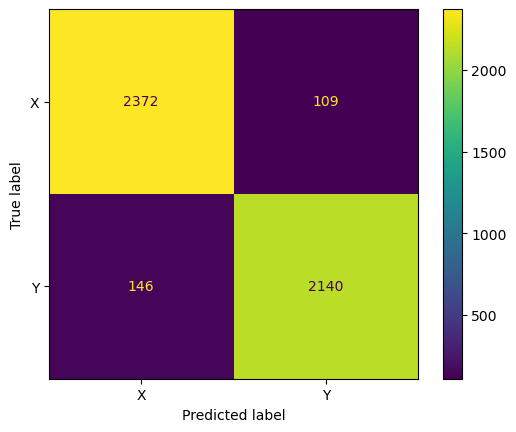

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
 
# Load the raw dataset
Raw_data = pd.read_csv('fifa_players.csv')
 
Raw_data.head()
 
# Ensure the 'positions' column contains only valid string values
Raw_data['positions'] = Raw_data['positions'].astype(str)
 
# First remove goalkeepers from the dataset, their positions are not relevant for this analysis
No_GK_data = Raw_data[~Raw_data['positions'].str.contains('GK', na=False)]
 
# Removing columns that are not relevant for the analysis
# positions is removed, because in the future we only have data for outfield players
Clean_data = No_GK_data.drop(['positions',"name","full_name","weak_foot(1-5)","overall_rating","skill_moves(1-5)","birth_date","age","height_cm","weight_kgs","nationality","potential","value_euro","wage_euro","international_reputation(1-5)","national_team_position","preferred_foot","body_type","release_clause_euro","national_team","national_rating","national_jersey_number"], axis=1) #Deleting raw data
 
# Define attacking and defending attributes
attacking_attributes = ['crossing', 'finishing', 'short_passing', 'volleys', 'dribbling', 'curve', 'long_passing', 'ball_control', 'sprint_speed', 'agility', 'shot_power', 'long_shots', 'vision']
defending_attributes = ['heading_accuracy', 'strength', 'aggression', 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle', 'positioning']
 
# Calculate attacking and defending scores
Clean_data['attacking_score'] = Clean_data[attacking_attributes].mean(axis=1)
Clean_data['defending_score'] = Clean_data[defending_attributes].mean(axis=1)
 
# Classify players as 'Attacker' or 'Defender'
Clean_data['role'] = Clean_data.apply(lambda row: 'Attacker' if row['attacking_score'] > row['defending_score'] else 'Defender', axis=1)
 
# Select relevant features and target variable
features = attacking_attributes + defending_attributes
target = 'role'
 
# Drop rows with missing values in features and target
Clean_data = Clean_data.dropna(subset=features + [target])
 
# Encode the target variable
label_encoder = LabelEncoder()
Clean_data[target] = label_encoder.fit_transform(Clean_data[target])
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Clean_data[features], Clean_data[target], test_size=0.3, random_state=42)
 
# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
 
# Make predictions on the testing set
y_pred = nb_classifier.predict(X_test)
 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
 
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
 
matrix = confusion_matrix(y_test, y_pred)
labelNames = pd.Series(['X', 'Y'])
pd.DataFrame(matrix,
     columns='Predicted ' + labelNames,
     index='Is ' + labelNames)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labelNames)
disp.plot()
 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
 
print(f'\nAdditional Metrics:')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')
 
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))